In [7]:
import iplantuml

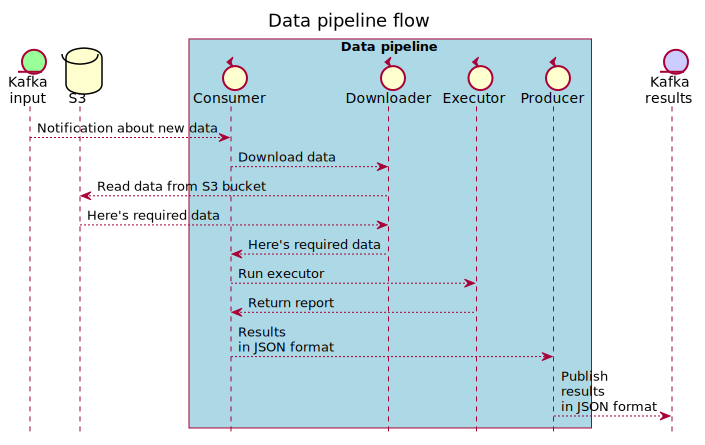

In [31]:
%%plantuml

@startuml
hide footbox
title Data pipeline flow

entity "Kafka\ninput" as kafka1 #99ff99
database S3
box "Data pipeline" #LightBlue
    control Consumer
    control Downloader
    control Executor
    control Producer
end box
entity "Kafka\nresults" as kafka2 #ccccff

kafka1 --> Consumer : Notification about new data
Consumer --> Downloader : Download data
Downloader --> S3 : Read data from S3 bucket
S3 --> Downloader : Here's required data
Downloader --> Consumer : Here's required data
Consumer --> Executor : Run executor
Executor --> Consumer : Return report
Consumer --> Producer : Results\nin JSON format
Producer --> kafka2 : Publish\nresults\nin JSON format

@enduml